In [1]:
import pandas as pd

In [4]:
teams_df = pd.read_csv('Team_Records.csv')

In [5]:
teams_df.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [6]:
teams_df.tail()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
1478,1999-00,NBA,Vancouver Grizzlies,22,60,0.268,7,-5.10,91.0,-2.1,102.3,-1.8,108.5,4.4,NaN,B. Hill (4-18) L. Hollins (18-42),S. Abdur-Rahim (8.8)
1479,1998-99,NBA,Vancouver Grizzlies,8,42,0.160,7,-8.94,89.0,0.1,98.4,-3.8,107.9,5.7,NaN,B. Hill (8-42),S. Abdur-Rahim (4.6)
1480,1997-98,NBA,Vancouver Grizzlies,19,63,0.232,6,-7.47,92.1,1.8,104.1,-0.9,112.0,7.0,NaN,B. Hill (19-63),S. Abdur-Rahim (6.9)
1481,1996-97,NBA,Vancouver Grizzlies,14,68,0.171,7,-10.17,88.4,-1.7,100.3,-6.4,111.8,5.1,NaN,B. Winters (8-35) S. Jackson (6-33),G. Anthony (3.5)
1482,1995-96,NBA,Vancouver Grizzlies,15,67,0.183,7,-9.55,91.0,-0.8,97.6,-10.0,108.5,0.9,NaN,B. Winters (15-67),G. Anthony (4.8)


In [7]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    1483 non-null   object 
 1   Lg        1483 non-null   object 
 2   Team      1483 non-null   object 
 3   W         1483 non-null   int64  
 4   L         1483 non-null   int64  
 5   W/L%      1483 non-null   float64
 6   Finish    1483 non-null   int64  
 7   SRS       1483 non-null   float64
 8   Pace      1463 non-null   float64
 9   Rel_Pace  1463 non-null   float64
 10  ORtg      1463 non-null   float64
 11  Rel_ORtg  1463 non-null   float64
 12  DRtg      1463 non-null   float64
 13  Rel_DRtg  1463 non-null   float64
 14  Playoffs  860 non-null    object 
 15  Coaches   1483 non-null   object 
 16  Top WS    1483 non-null   object 
dtypes: float64(8), int64(3), object(6)
memory usage: 197.1+ KB


In [8]:
teams_df.shape

(1483, 17)

In [22]:
teams_df.isnull().sum()

Season        0
Lg            0
Team          0
W             0
L             0
W/L%          0
Finish        0
SRS           0
Pace          0
Rel_Pace      0
ORtg          0
Rel_ORtg      0
DRtg          0
Rel_DRtg      0
Playoffs    623
Coaches       0
Top WS        0
dtype: int64

In [23]:
teams_df[['Playoffs']]

,Playoffs
0,NaN
1,Lost E. Conf. Finals
2,Lost E. Conf. 1st Rnd.
3,Lost E. Conf. 1st Rnd.
4,NaN
...,...
1478,NaN
1479,NaN
1480,NaN
1481,NaN


In [24]:
teams_df['Pace'] = teams_df['Pace'].fillna(teams_df['Pace'].mean())
teams_df['Rel_Pace'] = teams_df['Rel_Pace'].fillna(teams_df['Rel_Pace'].mean())
teams_df['ORtg'] = teams_df['ORtg'].fillna(teams_df['ORtg'].mean())
teams_df['Rel_ORtg'] = teams_df['Rel_ORtg'].fillna(teams_df['Rel_ORtg'].mean())
teams_df['DRtg'] = teams_df['DRtg'].fillna(teams_df['DRtg'].mean())
teams_df['Rel_DRtg'] = teams_df['Rel_DRtg'].fillna(teams_df['Rel_DRtg'].mean())

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Training Features
X = teams_df.drop(columns = ['W', 'Season', 'Team', 'Lg', 'Playoffs', 'Coaches', 'Top WS'])
X

,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg
0,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0
1,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4
2,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8
3,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1
4,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0
...,...,...,...,...,...,...,...,...,...,...
1478,60,0.268,7,-5.10,91.0,-2.1,102.3,-1.8,108.5,4.4
1479,42,0.160,7,-8.94,89.0,0.1,98.4,-3.8,107.9,5.7
1480,63,0.232,6,-7.47,92.1,1.8,104.1,-0.9,112.0,7.0
1481,68,0.171,7,-10.17,88.4,-1.7,100.3,-6.4,111.8,5.1


In [27]:
#Label
y = teams_df['W']
y

0       29
1       53
2       48
3       40
4       25
        ..
1478    22
1479     8
1480    19
1481    14
1482    15
Name: W, Length: 1483, dtype: int64

In [28]:
#Splitting our dataset using 30% of our data as test zize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
X_test

,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg
9,20,0.756,1,7.44,90.4,-1.3,110.5,2.2,102.3,-6.0
342,35,0.573,4,1.86,95.4,-1.2,110.7,2.5,108.8,0.6
676,26,0.683,2,4.25,115.8,-1.3,102.1,3.1,98.1,-0.9
1287,44,0.450,3,-0.50,116.6,-4.8,95.6,0.7,96.1,1.2
893,55,0.329,4,-3.55,104.3,-2.4,100.3,-0.6,103.8,2.9
...,...,...,...,...,...,...,...,...,...,...
1298,46,0.361,4,-2.66,100.5,2.4,86.4,-3.4,89.4,-0.4
729,22,0.371,5,-5.40,97.5,0.4,102.2,-5.6,107.9,0.1
1419,64,0.220,5,-6.30,87.6,-3.3,99.7,-6.4,107.7,1.6
1191,64,0.220,4,-6.15,92.3,1.4,101.1,-5.0,107.5,1.4


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#Fitting our training data
lr = LinearRegression().fit(X_train, y_train)

In [32]:
# Y intercept
c = lr.intercept_
c

-69.81789640049335

In [33]:
# Coeficient
m = lr.coef_
m

array([ 8.43831077e-01,  1.41425607e+02,  5.61780928e-02, -2.41729524e-01,
        2.00373045e-02, -3.07521480e-02, -3.68084249e+00,  4.08117476e+00,
        3.71082680e+00, -4.13055131e+00])

In [34]:
#Prediction using our training data
y_pred_train = lr.predict(X_train)
y_pred_train

array([47.74290555, 46.3681103 , 49.75660894, ..., 51.48392179,
       37.3316639 , 46.30707337])

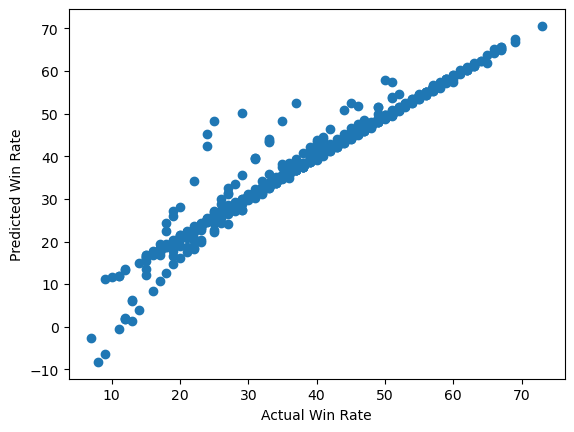

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.show()

In [36]:
from sklearn.metrics import r2_score

In [37]:
#Checking R2 Score
r2_score(y_train, y_pred_train)

0.9630725217754292

In [38]:
#Predict using our test data
y_pred_test = lr.predict(X_test)

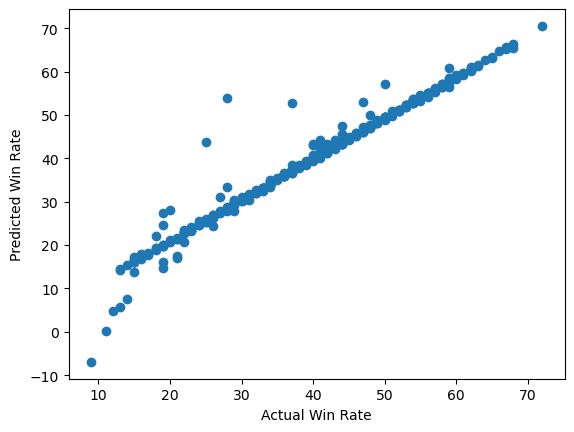

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.show()

In [40]:
r2_score(y_test, y_pred_test)

0.9664501148902326

In [41]:
teams_df.to_excel('teams.xlsx', index=False)

In [42]:
import statsmodels.api as sm

In [43]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     3966.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:30:35   Log-Likelihood:                -3398.7
No. Observations:                1483   AIC:                             6819.
Df Residuals:                    1472   BIC:                             6878.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.6344      2.486    -28.817      0.0